In [1]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framewo

In [2]:
import pandas as pd
import numpy as np
import random
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import brewer2mpl

In [5]:
def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

In [6]:
def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='classification.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train
    

In [7]:
emotion = {'Angry':0,'Disgust':1,'Fear':2,'Happy':3,'Sad':4,'Surprise':5,'Netural':6}
emo = ['Angry','Fear','Happy','Sad','Surprise','Netural']

In [8]:
X_test,y_test = load_data(sample_split=1.0,classes=emo,usage='PrivateTest')

Disgust classified as Angry


In [9]:
X_train,y_train = load_data(sample_split=1.0,classes=emo,usage='Training')

Disgust classified as Angry


In [10]:
X_val,y_val = load_data(sample_split=1.0,classes=emo,usage='PublicTest')

Disgust classified as Angry


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


In [12]:
def save_data(X_test,y_test,fname=''):
    np.save('X_test'+fname,X_test)
    np.save('y_test'+fname,y_test)
save_data(X_test,y_test,"_privatetest")
X_fname = 'X_test_privatetest.npy'
y_fname = 'y_test_privatetest.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (zip(labels, counts))

Private test set


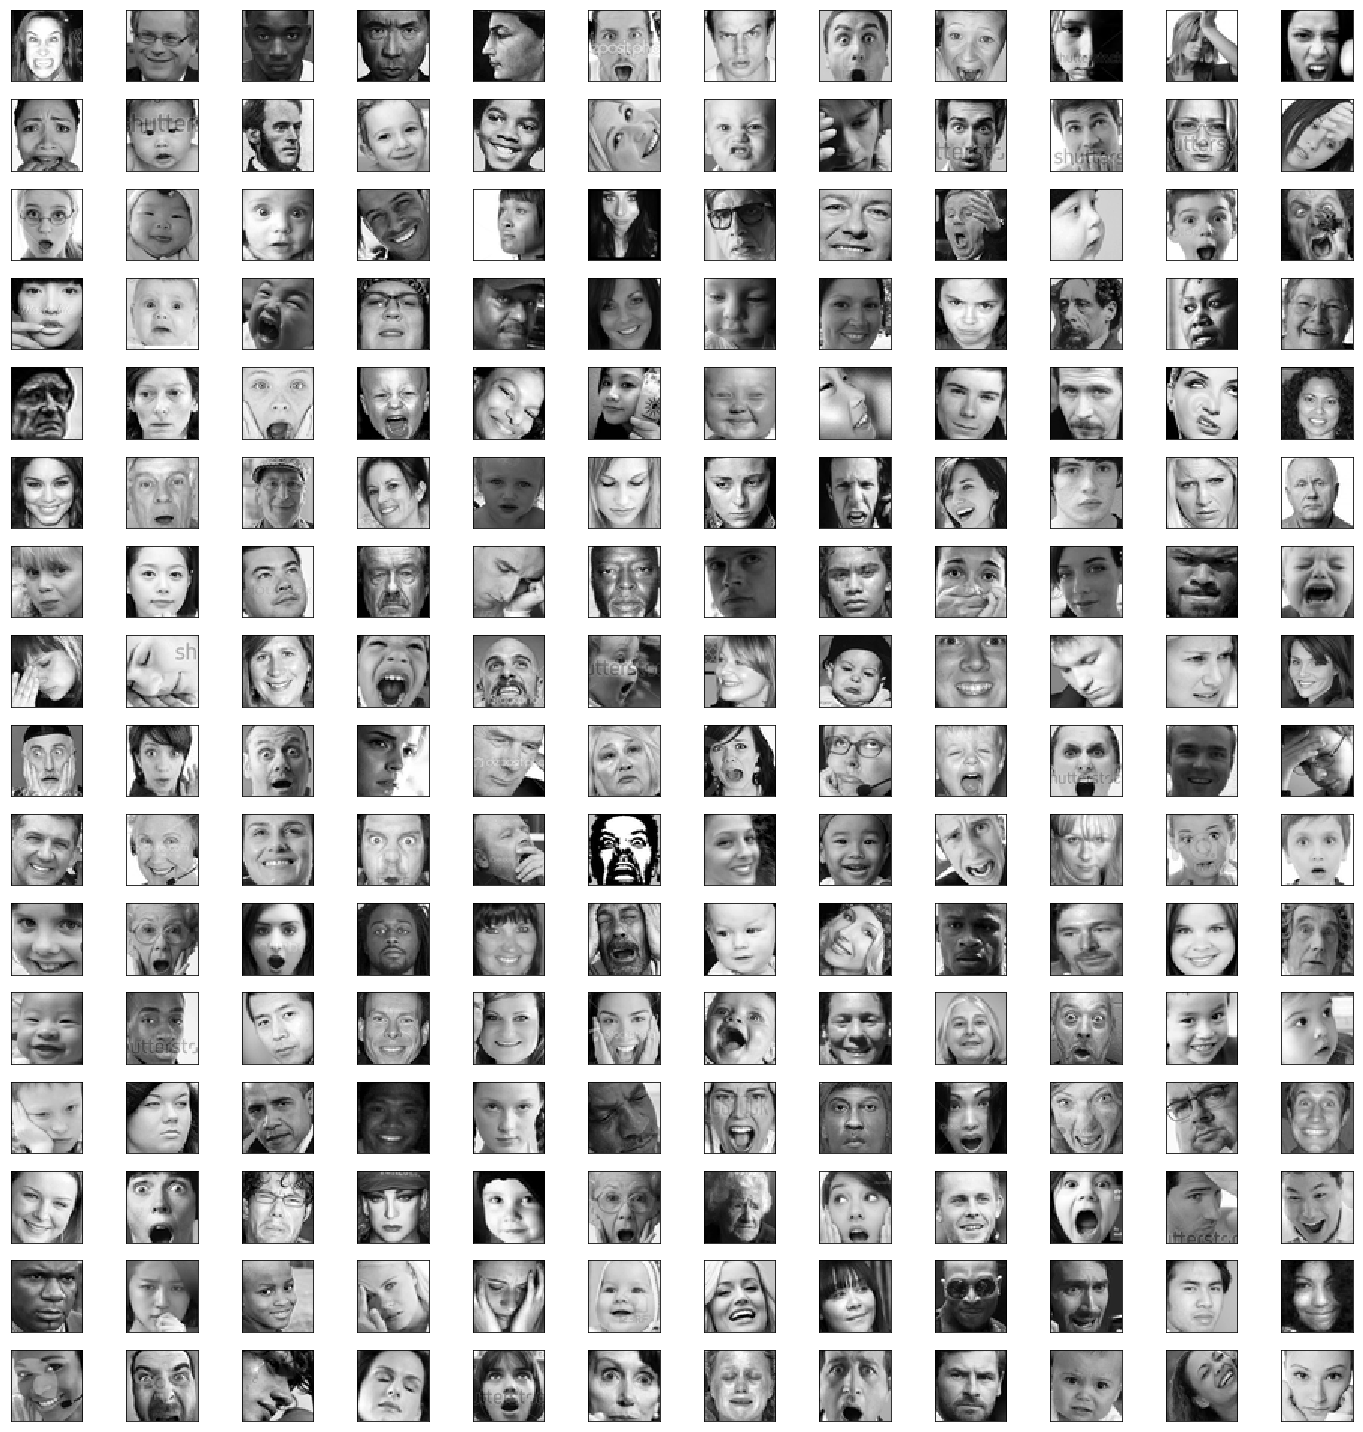

In [13]:
def overview(start,end,X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start,end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0],cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191,X)

(1, 48, 48, 1)


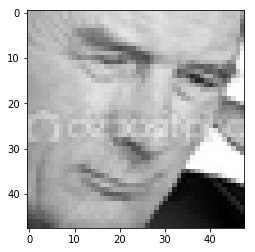

In [14]:
input_img = X[100:101,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [15]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

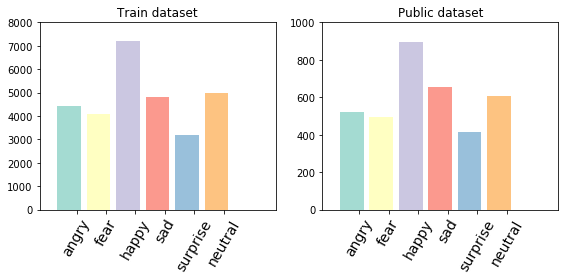

In [16]:
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
 
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Public dataset'], \
                  ylims =[8000,1000]) 

In [17]:
#Model Architecture
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,AvgPool2D,BatchNormalization,Dropout,Activation,MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D

In [19]:
from keras import layers
from keras import models
from keras import optimizers

In [20]:
modelN = models.Sequential()

In [21]:
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [22]:
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [23]:
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [24]:
modelN.add(layers.Flatten()) #converts our 3D feature map to 1D feature version
modelN.add(layers.Dense(64,activation = 'relu'))
modelN.add(layers.Dense(64,activation = 'relu'))
modelN.add(layers.Dense(6,activation = 'softmax'))

In [25]:
modelN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
__________

In [26]:
modelN.compile(loss = 'mse',optimizer='adam',metrics=['mae','accuracy'])
print('Training')

Training


In [27]:
modelF = modelN.fit(X_train,y_train,epochs = 10,batch_size=128,validation_data=(X_val,y_val),shuffle=True,verbose=1)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 874s 30ms/step - loss: 0.1374 - mean_absolute_error: 0.2745 - acc: 0.2509 - val_loss: 0.1372 - val_mean_absolute_error: 0.2734 - val_acc: 0.2494
Epoch 2/10
28709/28709 [==============================] - 894s 31ms/step - loss: 0.1371 - mean_absolute_error: 0.2742 - acc: 0.2513 - val_loss: 0.1371 - val_mean_absolute_error: 0.2738 - val_acc: 0.2494
Epoch 3/10
28709/28709 [==============================] - 867s 30ms/step - loss: 0.1363 - mean_absolute_error: 0.2725 - acc: 0.2561 - val_loss: 0.1344 - val_mean_absolute_error: 0.2706 - val_acc: 0.2700
Epoch 4/10
28709/28709 [==============================] - 888s 31ms/step - loss: 0.1264 - mean_absolute_error: 0.2525 - acc: 0.3436 - val_loss: 0.1161 - val_mean_absolute_error: 0.2269 - val_acc: 0.4213
Epoch 5/10
28709/28709 [==============================] - 798s 28ms/step - loss: 0.1136 - mean_absolute_error: 0.2266 - acc: 0.4346 - val_l

In [28]:
modelN.save('model.classification')

In [29]:
acc = modelF.history['acc']
val_acc = modelF.history['val_acc']
loss = modelF.history['loss']
val_loss = modelF.history['val_loss']

In [30]:
epochs = range(len(acc))

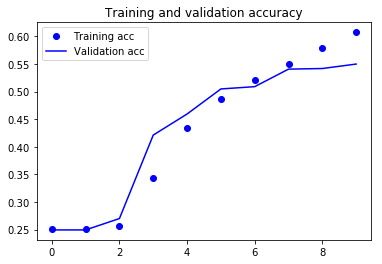

In [31]:
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

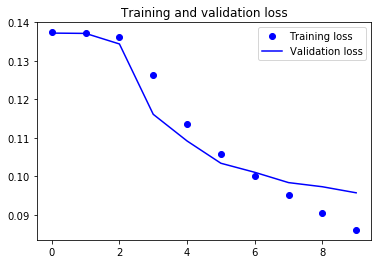

In [32]:
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
score = modelN.evaluate(X,y,verbose=0)

In [34]:
print("model %s:%.2f%%" %(modelN.metrics_names[1],score[1]*100))

model mean_absolute_error:18.26%


In [36]:
print("model %s:%.2f%%" %(modelN.metrics_names[2],score[2]*100))

model acc:54.05%


In [37]:
#prediction and true labels
y_prob = modelN.predict(X,batch_size=32,verbose=0)

In [38]:
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import matplotlib

In [66]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    """
    The function is used to plot the picture subjects
    """
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [77]:
import brewer2mpl
def plot_probs(start,end, y_prob):
    """
    The function is used to plot the probability in histogram for six labels 
    """
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
        ax.bar(np.arange(0,6), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [78]:
def plot_subjects_with_probs(start, end, y_prob):
    """
    This plotting function is used to plot the probability together with its picture
    """
    iter = int((end - start)/6)
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

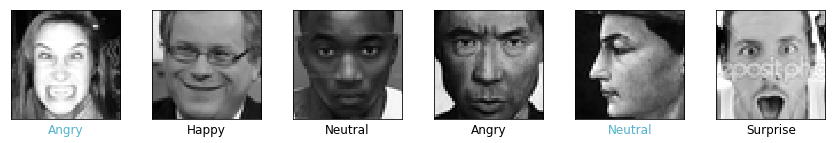

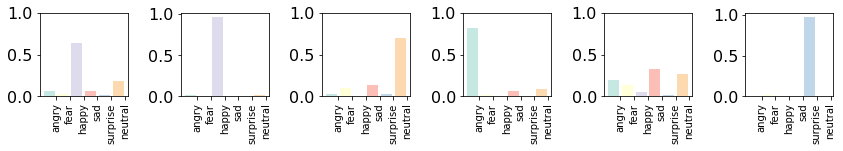

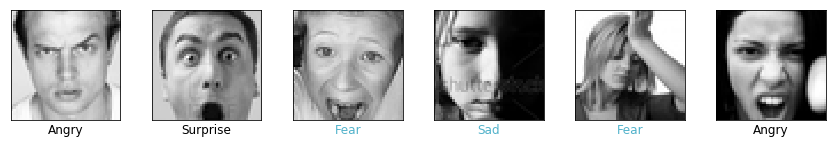

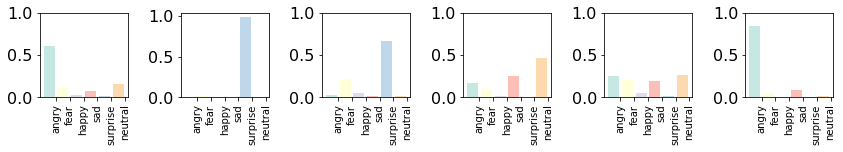

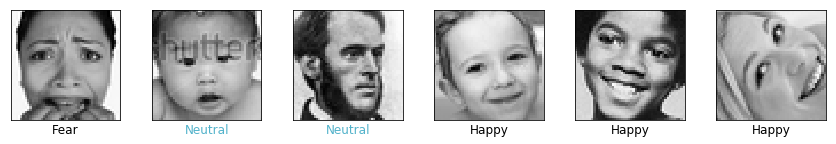

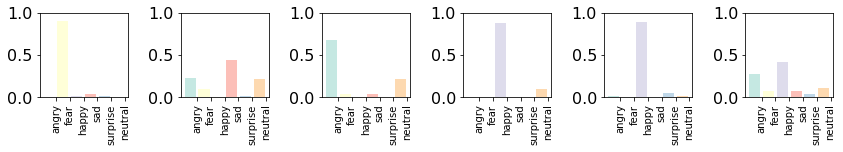

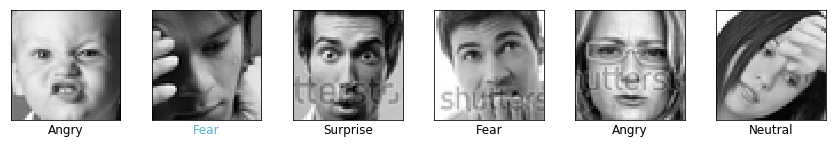

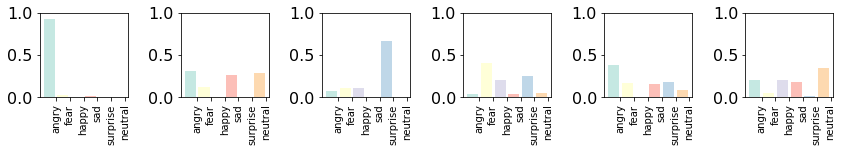

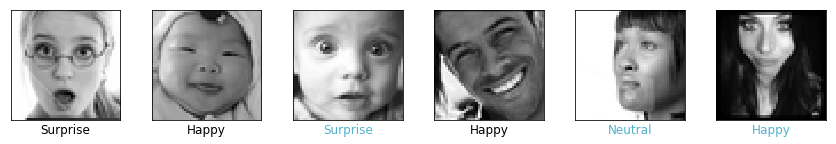

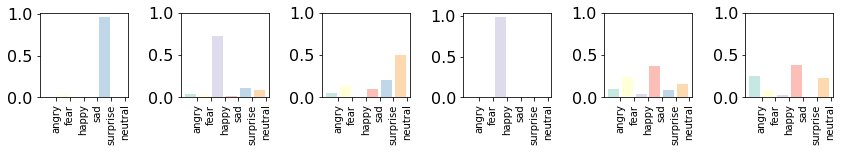

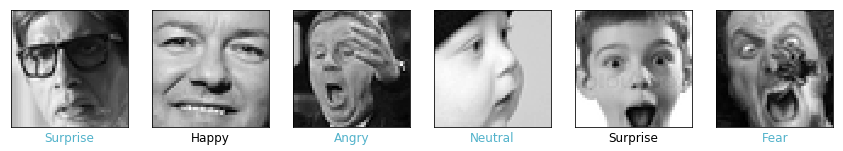

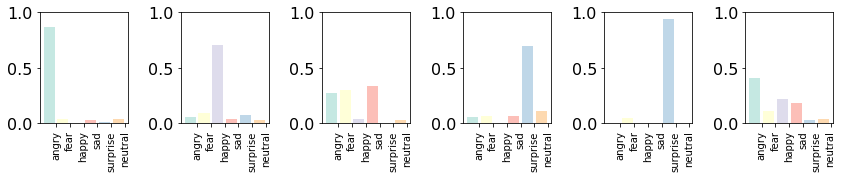

In [79]:
plot_subjects_with_probs(0, 36, y_prob)

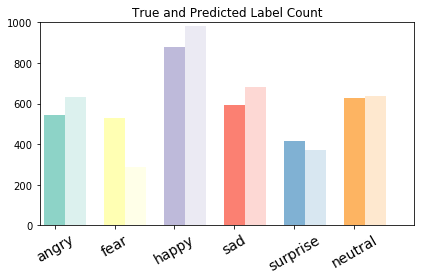

In [70]:
def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    ind = np.arange(1.5,7,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,7,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 7.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count')
    plt.tight_layout()
    plt.show()
    
plot_distribution2(y_true, y_pred)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
import matplotlib

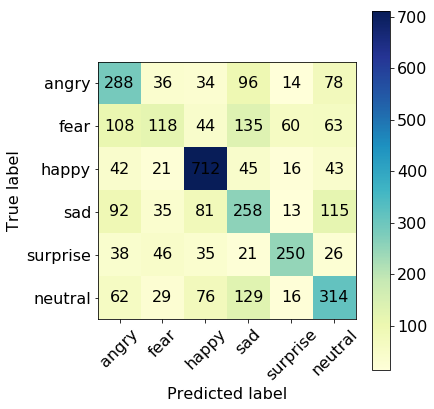

In [73]:
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    """
    The function is used to construct the confusion matrix 
    """
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,6):
        for j in range(0,6):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()